# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The requirement of the company is:
To Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Lead Scoring Data Analysis

The keys sections in this data analysis are:
1. Reading and understanding the data
2. Cleaning the data
3. Preparing the data for modelling
4. Modelling of the data
5. Determining optimum cut-off probability
6. Making predictions based on test dataset
7. Recommendations

## Reading and understanding the data

### Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
path = input("Enter the path to data file: ") #Enter the path to the file to be used by replacing all the '\' using '\\' or '/'

Enter the path to data file: D:/upGrad/.CONTENT/Assignments/Course 2 Case Study/Lead Scoring Assignment


In [463]:
data = pd.read_csv(path+'/Leads.csv') #the path will be used to read the file
data.head() #checking if data from the csv file is loading properly

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

### Checking the structure of the data

In [298]:
data.shape

(9240, 37)

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [300]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [301]:
data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

The lead scoring data provided comprises 9240 rows and 37 columns.
The names of the columns in the dataset are - 'Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'.

In the above data, a model using logistic regression will be created using the target variable as the columnn 'Converted'.

## Cleaning the data

In [464]:
#dropping the 'Prospect ID' column since there is another identifier column named 'Lead Number'
data = data.drop("Prospect ID", axis=1)

### Dealing with 'Select' values

In case of the 'Specialization' column, the 'Select' values might be present either because the customer is a fresher or his/her specialization field is not mentioned in the list. We will, therefore, consider these values to be missing.

In [465]:
#printing out columns that contain 'Select' values
for i in data.columns:
    if data[i].values.any() == 'Select':
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [466]:
data['Specialization'] = data['Specialization'].replace('Select',np.NaN)
data['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In the 'City' column, the 'Select' values will be considered as 'Other Cities'.

In [467]:
data['City'] = data['City'].replace('Select','Other Cities')
data['City'].unique()

array(['Other Cities', 'Mumbai', nan, 'Thane & Outskirts',
       'Other Metro Cities', 'Other Cities of Maharashtra',
       'Tier II Cities'], dtype=object)

For the column 'How did you hear about X Education', we will consider the 'Select' values as 'Other'.

In [468]:
data['How did you hear about X Education'] = data['How did you hear about X Education'].replace('Select','Other')
data['How did you hear about X Education'].unique()

array(['Other', 'Word Of Mouth', nan, 'Online Search', 'Multiple Sources',
       'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media',
       'SMS'], dtype=object)

In the 'Lead Profile' column, the 'Select' values will be considered as 'Other Leads'.

In [469]:
data['Lead Profile'] = data['Lead Profile'].replace('Select','Other Leads')
data['Lead Profile'].unique()

array(['Other Leads', 'Potential Lead', nan, 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

### Checking and treating missing values

In [470]:
round(100*(data.isnull().sum())/len(data), 2) #missing values in each column

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Since some of the columns have a very high number of missing values, we will have to delete them as they might cause some skewness in the results of the analysis. We will delete the columns with 40% or more missing values.

In [471]:
data = data.loc[:, data.isnull().mean() <= .4] #deleting columns with 40% or more missing data
round(100*(data.isnull().sum())/len(data), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Next, we will impute the missing values in some of the columns that contain 'Other' or similar values.
We will also impute the missing values in 'Specialization' and 'Tags' columns as 'Other' to create a separate category in the variable. Also, there is no 'Other' category present from before, hence, a new one can be created.

In [472]:
col = ['Specialization', 'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course','Tags','Country']
for i in col:
    data[i] = data[i].replace(np.NaN,"Other")
    print(data[i].unique())

['Other' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']
['Other' 'Word Of Mouth' 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']
['Unemployed' 'Student' 'Other' 'Working Professional' 'Businessman'
 'Housewife']
['Better Career Prospects' 'Other' 'Flexibility & Convenience']
['Interested in other courses' 'Ringing'
 'Will revert after reading the email' 'Other' 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzo

In [473]:
data['Lead Profile'] = data['Lead Profile'].replace(np.NaN,"Other Leads")
data['Lead Profile'].unique()

array(['Other Leads', 'Potential Lead', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [474]:
data['City'] = data['City'].replace(np.NaN,"Other Cities")
data['City'].unique()

array(['Other Cities', 'Mumbai', 'Thane & Outskirts',
       'Other Metro Cities', 'Other Cities of Maharashtra',
       'Tier II Cities'], dtype=object)

In [475]:
round(100*(data.isnull().sum())/len(data), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [476]:
clean_data = data[~(data.isnull().sum(axis=1) > 0)] # deleting rows with missing values
clean_data.shape

(9074, 31)

In [477]:
round(100*(clean_data.isnull().sum())/len(clean_data), 2) #checking missing values again

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

We can see above that the current dataset does not have any missing values and around 98% of the rows have been retained.

### Treating categorical columns with skewed values

Now, we will check the variances of the values of each of the categorical column in the dataset and treat the values that show very small variance.

In [478]:
clean_data["Specialization"].value_counts()

Other                                3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [479]:
clean_data["How did you hear about X Education"].value_counts()

Other                    7272
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

This column can be dropped since most of the variance is available in the 'Other' category which is not adding much information.

In [480]:
clean_data["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [481]:
clean_data["What is your current occupation"].value_counts()

Unemployed              5476
Other                   2698
Working Professional     677
Student                  206
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [526]:
#the categories 'Student','Housewife' and 'Businessman' can be clubbed with 'Other' to reduce number of categories

clean_data["What is your current occupation"] = clean_data["What is your current occupation"].replace(['Student','Housewife', 'Businessman'],'Other')
clean_data["What is your current occupation"].value_counts()

Unemployed              5476
Other                   2921
Working Professional     677
Name: What is your current occupation, dtype: int64

In [482]:
clean_data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
youtubechannel          1
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [483]:
#we can club the values with extremely low variance to form another value as 'Other'.
#This will reduce the number of unique categories which, in turn, will reduce the number of dummy variables

clean_data["Lead Source"] = clean_data["Lead Source"].replace('google', 'Google')
clean_data["Lead Source"] = clean_data["Lead Source"].replace(['bing','Click2call','Live Chat','Press_Release','Social Media','NC_EDM',
                                                   'youtubechannel','blog','welearnblog_Home','Pay per Click Ads','WeLearn',
                                                   'testone','Welingak Website','Referral Sites','Facebook'],'Other')
clean_data["Lead Source"].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Other              308
Name: Lead Source, dtype: int64

In [484]:
clean_data["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [485]:
#the values with extremely low variance can be clubbed together to form a new value 'Other'
clean_data["Last Activity"] = clean_data["Last Activity"].replace(['Form Submitted on Website','Unreachable', 'Email Received',
                                                                 'Unsubscribed','Email Marked Spam','Had a Phone Conversation',
                                                                 'View in browser link Clicked','Approached upfront','Resubscribed to emails',
                                                                 'Visited Booth in Tradeshow'],'Other')
clean_data["Last Activity"].value_counts()

Email Opened               3432
SMS Sent                   2716
Olark Chat Conversation     972
Page Visited on Website     640
Converted to Lead           428
Email Bounced               312
Other                       307
Email Link Clicked          267
Name: Last Activity, dtype: int64

In [486]:
clean_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6370
Other                        2703
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [524]:
#the category 'Flexibility & Convenience' can be clubbed in 'Other' in a separate variable.
def reason_for_choosing_course(x):
    if x["What matters most to you in choosing a course"] == 'Better Career Prospects':
        return 'Better Career Prospects'
    else:
        return 'Other'

clean_data["Course_Reason"] = clean_data.apply(lambda x: reason_for_choosing_course(x), axis=1)
clean_data = clean_data.drop("What matters most to you in choosing a course", axis=1)
clean_data["Course_Reason"].value_counts()

Better Career Prospects    6370
Other                      2704
Name: Course_Reason, dtype: int64

In [487]:
clean_data["Digital Advertisement"].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [488]:
clean_data["Search"].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [489]:
clean_data["Magazine"].value_counts()

No    9074
Name: Magazine, dtype: int64

In [490]:
clean_data["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [491]:
clean_data["X Education Forums"].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [492]:
clean_data["Newspaper"].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [493]:
clean_data["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [494]:
clean_data["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [495]:
clean_data["Tags"].value_counts()

Other                                                3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [496]:
clean_data["Lead Profile"].value_counts()

Other Leads                    7239
Potential Lead                 1554
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [497]:
clean_data["A free copy of Mastering The Interview"].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [498]:
clean_data["Last Notable Activity"].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [523]:
#categories with extremely low variance can be clubbed together to form another new value as 'Other' in this column
clean_data["Last Notable Activity"] = clean_data["Last Notable Activity"].replace(['Form Submitted on Website','Unreachable', 'Email Received',
                                                                 'Unsubscribed','Email Marked Spam','Had a Phone Conversation',
                                                                 'View in browser link Clicked','Approached upfront','Resubscribed to emails',
                                                                 'Email Bounced','Page Visited on Website','Olark Chat Conversation',
                                                                                   'Email Link Clicked'],'Other')
clean_data["Last Notable Activity"].value_counts()

Modified        3267
Email Opened    2823
SMS Sent        2152
Other            832
Name: Last Notable Activity, dtype: int64

In [500]:
clean_data["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [501]:
clean_data["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [502]:
clean_data["Country"].value_counts()

India                   6491
Other                   2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Sweden                     3
Italy                      2
Asia/Pacific Region        2
Philippines                2
China                      2
Uganda                     2
Netherlands                2
Bangladesh                 2
Belgium                    2
Ghana                      2
Liberia                    1
Denmark                    1
Vietnam                    1
Indonesia                  1
Kenya                      1
Switzerland   

In [503]:
#Since more than 90% of the variance of this column is explained in 2 values, we can also create another variable
def In_India(x):
    if x['Country'] == 'India':
        return 'Yes'
    else:
        return 'No'

clean_data["In India"] = clean_data.apply(lambda x: In_India(x), axis=1)
clean_data = clean_data.drop("Country", axis=1)
clean_data["In India"].value_counts()

Yes    6491
No     2583
Name: In India, dtype: int64

In [504]:
clean_data["Update me on Supply Chain Content"].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [505]:
clean_data["Get updates on DM Content"].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [506]:
clean_data["City"].value_counts()

Other Cities                   4255
Mumbai                         3177
Thane & Outskirts               745
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [525]:
#creating separate variable using 'City' column
def In_Mumbai(x):
    if x['City'] == 'Mumbai':
        return 'Yes'
    else:
        return 'No'

clean_data["In Mumbai"] = clean_data.apply(lambda x: In_Mumbai(x), axis=1)
clean_data = clean_data.drop("City", axis=1)
clean_data["In Mumbai"].value_counts()

No     5897
Yes    3177
Name: In Mumbai, dtype: int64

In [507]:
clean_data["I agree to pay the amount through cheque"].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

Now, we will drop the columns that either have a single value or whose maximum variance is explained by one value.

In [536]:
clean_df = clean_data.drop(["Digital Advertisement","Search","Magazine","Newspaper Article","Newspaper","X Education Forums",
                            "Through Recommendations","Receive More Updates About Our Courses","Do Not Email","How did you hear about X Education",
                            "I agree to pay the amount through cheque","Update me on Supply Chain Content","Get updates on DM Content","Do Not Call"],axis=1)
clean_df.head()

Lead Number              Lead Origin     Lead Source  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation                                 Tags    Lead Profile A free copy of Mastering The Interview Last Notable Activity In India            Course_Reason In Mumbai
0       660737                      API      Olark Chat          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed          Interested in other courses     Other Leads                                     No              Modified       No  Better Career Prospects        No
1       660728                      API  Organic Search          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                              Ringing     Other Leads                                     No          Email Opened      Yes  Better Career Prospects        No
2       660727  Landing Page Submission  Direct Traffic          1          2.0                         1532                   2.0             Email Opened  Business Administration                           Other  Will revert after reading the email  Potential Lead                                    Yes          Email Opened      Yes  Better Career Prospects       Yes
3       660719  Landing Page Submission  Direct Traffic          0          1.0                          305                   1.0                    Other    Media and Advertising                      Unemployed                              Ringing     Other Leads                                     No              Modified      Yes  Better Career Prospects       Yes
4       660681  Landing Page Submission          Google          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed  Will revert after reading the email     Other Leads                                     No              Modified      Yes  Better Career Prospects       Yes

## Preparing the data for modelling

In [533]:
clean_df.head()

Lead Number              Lead Origin     Lead Source  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation                                 Tags    Lead Profile A free copy of Mastering The Interview Last Notable Activity In India            Course_Reason In Mumbai
0       660737                      API      Olark Chat          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed          Interested in other courses     Other Leads                                     No              Modified       No  Better Career Prospects        No
1       660728                      API  Organic Search          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                              Ringing     Other Leads                                     No          Email Opened      Yes  Better Career Prospects        No
2       660727  Landing Page Submission  Direct Traffic          1          2.0                         1532                   2.0             Email Opened  Business Administration                           Other  Will revert after reading the email  Potential Lead                                    Yes          Email Opened      Yes  Better Career Prospects       Yes
3       660719  Landing Page Submission  Direct Traffic          0          1.0                          305                   1.0                    Other    Media and Advertising                      Unemployed                              Ringing     Other Leads                                     No              Modified      Yes  Better Career Prospects       Yes
4       660681  Landing Page Submission          Google          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed  Will revert after reading the email     Other Leads                                     No              Modified      Yes  Better Career Prospects       Yes

In [534]:
clean_df.shape

(9074, 17)

### Replacing Yes/No columns with 0/1

In [537]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview', 'In India','In Mumbai']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
clean_df[varlist] = clean_df[varlist].apply(binary_map)
clean_df.head()

Lead Number              Lead Origin     Lead Source  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation                                 Tags    Lead Profile  A free copy of Mastering The Interview Last Notable Activity  In India            Course_Reason  In Mumbai
0       660737                      API      Olark Chat          0          0.0                            0                   0.0  Page Visited on Website                    Other                      Unemployed          Interested in other courses     Other Leads                                       0              Modified         0  Better Career Prospects          0
1       660728                      API  Organic Search          0          5.0                          674                   2.5             Email Opened                    Other                      Unemployed                              Ringing     Other Leads                                       0          Email Opened         1  Better Career Prospects          0
2       660727  Landing Page Submission  Direct Traffic          1          2.0                         1532                   2.0             Email Opened  Business Administration                           Other  Will revert after reading the email  Potential Lead                                       1          Email Opened         1  Better Career Prospects          1
3       660719  Landing Page Submission  Direct Traffic          0          1.0                          305                   1.0                    Other    Media and Advertising                      Unemployed                              Ringing     Other Leads                                       0              Modified         1  Better Career Prospects          1
4       660681  Landing Page Submission          Google          1          2.0                         1428                   1.0        Converted to Lead                    Other                      Unemployed  Will revert after reading the email     Other Leads                                       0              Modified         1  Better Career Prospects          1

### Creating dummy variables of categorical columns

In [540]:
var = ['Lead Origin','Lead Source','Last Activity','Specialization', 'Tags','Lead Profile', 'Course_Reason','Last Notable Activity',
       'What is your current occupation']
temp = pd.get_dummies(clean_df[var], drop_first = True)
new_df = pd.concat([clean_df, temp], axis = 1)
new_df.drop(var, axis=1, inplace = True)
new_df.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  A free copy of Mastering The Interview  In India  In Mumbai  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other  Lead Source_Reference  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Olark Chat Conversation  Last Activity_Other  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  \
0       660737          0          0.0                            0                   0.0                                       0         0          0                                    0                          0                        0                   0                       1                           0                  0                      0                            0                                 0                           0                                      0                    0                                      1                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
1       660728          0          5.0                          674                   2.5                                       0         1          0                                    0                          0                        0                   0                       0                           1                  0                      0                            0                                 0                           1                                      0                    0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
2       660727          1          2.0                         1532                   2.0                                       1         1          1                                    1                          0                        0                   0                       0                           0                  0                      0                            0                                 0                           1                                      0                    0                                      0                       0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0   
3       660719          0          1.0                          305                   1.0                          

In [541]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 77 columns):
Lead Number                                               9074 non-null int64
Converted                                                 9074 non-null int64
TotalVisits                                               9074 non-null float64
Total Time Spent on Website                               9074 non-null int64
Page Views Per Visit                                      9074 non-null float64
A free copy of Mastering The Interview                    9074 non-null int64
In India                                                  9074 non-null int64
In Mumbai                                                 9074 non-null int64
Lead Origin_Landing Page Submission                       9074 non-null uint8
Lead Origin_Lead Add Form                                 9074 non-null uint8
Lead Origin_Lead Import                                   9074 non-null uint8
Lead Source_Google             

We can see that the dataframe contains only numeric variables.

### Outlier treatment

In [514]:
#checking the continous variables in the data for outliers
new_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

The columns 'TotalVisits' and 'Page Views Per Visit' might have a few outliers.

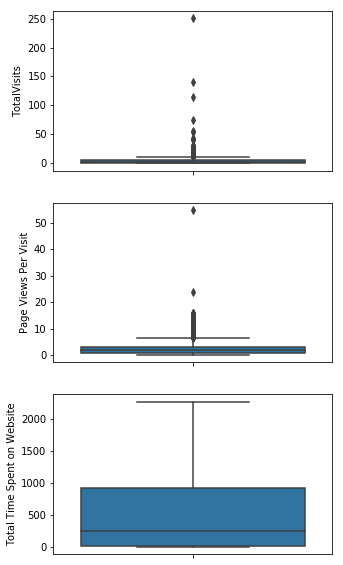

In [515]:
#visualising the outliers
temp = ['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']
plt.figure(figsize = (5,10))
for i in enumerate(temp):
    plt.subplot(3,1,i[0]+1)
    sns.boxplot(y = i[1], data = new_df)

The visualisation above shows that the columns 'TotalVisits' and 'Page Views Per Visit' contains outliers. However, since the number of outliers in the columns seems to be high, we will be retaining these data points.

In [543]:
#checking the rate of conversion in new_df
conversion = (sum(new_df['Converted'])/len(new_df['Converted'].index))*100
conversion

37.85541106458012

Here, we can see that the conversion rate is approximately 38%.

### Slitting dataset into test/train datasets

In [544]:
from sklearn.model_selection import train_test_split

#storing the feature variables
X = new_df.drop(['Lead Number', 'Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  A free copy of Mastering The Interview  In India  In Mumbai  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other  Lead Source_Reference  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Olark Chat Conversation  Last Activity_Other  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  \
0          0.0                            0                   0.0                                       0         0          0                                    0                          0                        0                   0                       1                           0                  0                      0                            0                                 0                           0                                      0                    0                                      1                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0   
1          5.0                          674                   2.5                                       0         1          0                                    0                          0                        0                   0                       0                           1                  0                      0                            0                                 0                           1                                      0                    0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0   
2          2.0                         1532                   2.0                                       1         1          1                                    1                          0                        0                   0                       0                           0                  0                      0                            0                                 0                           1                                      0                    0                                      0                       0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0   
3          1.0                          305                

In [545]:
#storing the response variable
y = new_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [546]:
#splitting the available dataset into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the continous variables

In [547]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #initialising an object

X_train[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  A free copy of Mastering The Interview  In India  In Mumbai  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other  Lead Source_Reference  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Olark Chat Conversation  Last Activity_Other  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Operations Management  \
3009    -0.284595                    -0.160255             -0.179666                                       1         1          1                                    1                          0                        0                   0                       0                           0                  0                      0                            0                                 0                           1                                      0                    0                                      0                       0                                       0                          0                          0                                  1                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0   
1012    -0.284595                    -0.540048             -0.179666                                       0         1          1                                    1                          0                        0                   0                       0                           0                  0                      0                            1                                 0                           0                                      0                    0                                      0                       0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0   
9226    -0.671384                    -0.888650             -1.132538                                       0         0          0                                    0                          0                        0                   0                       1                           0                  0                      0                            0                                 0                           0                                      0                    0                                      0                       1                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                                     0   
4750    -0.284595                     1.643304    

### Correlation matrix

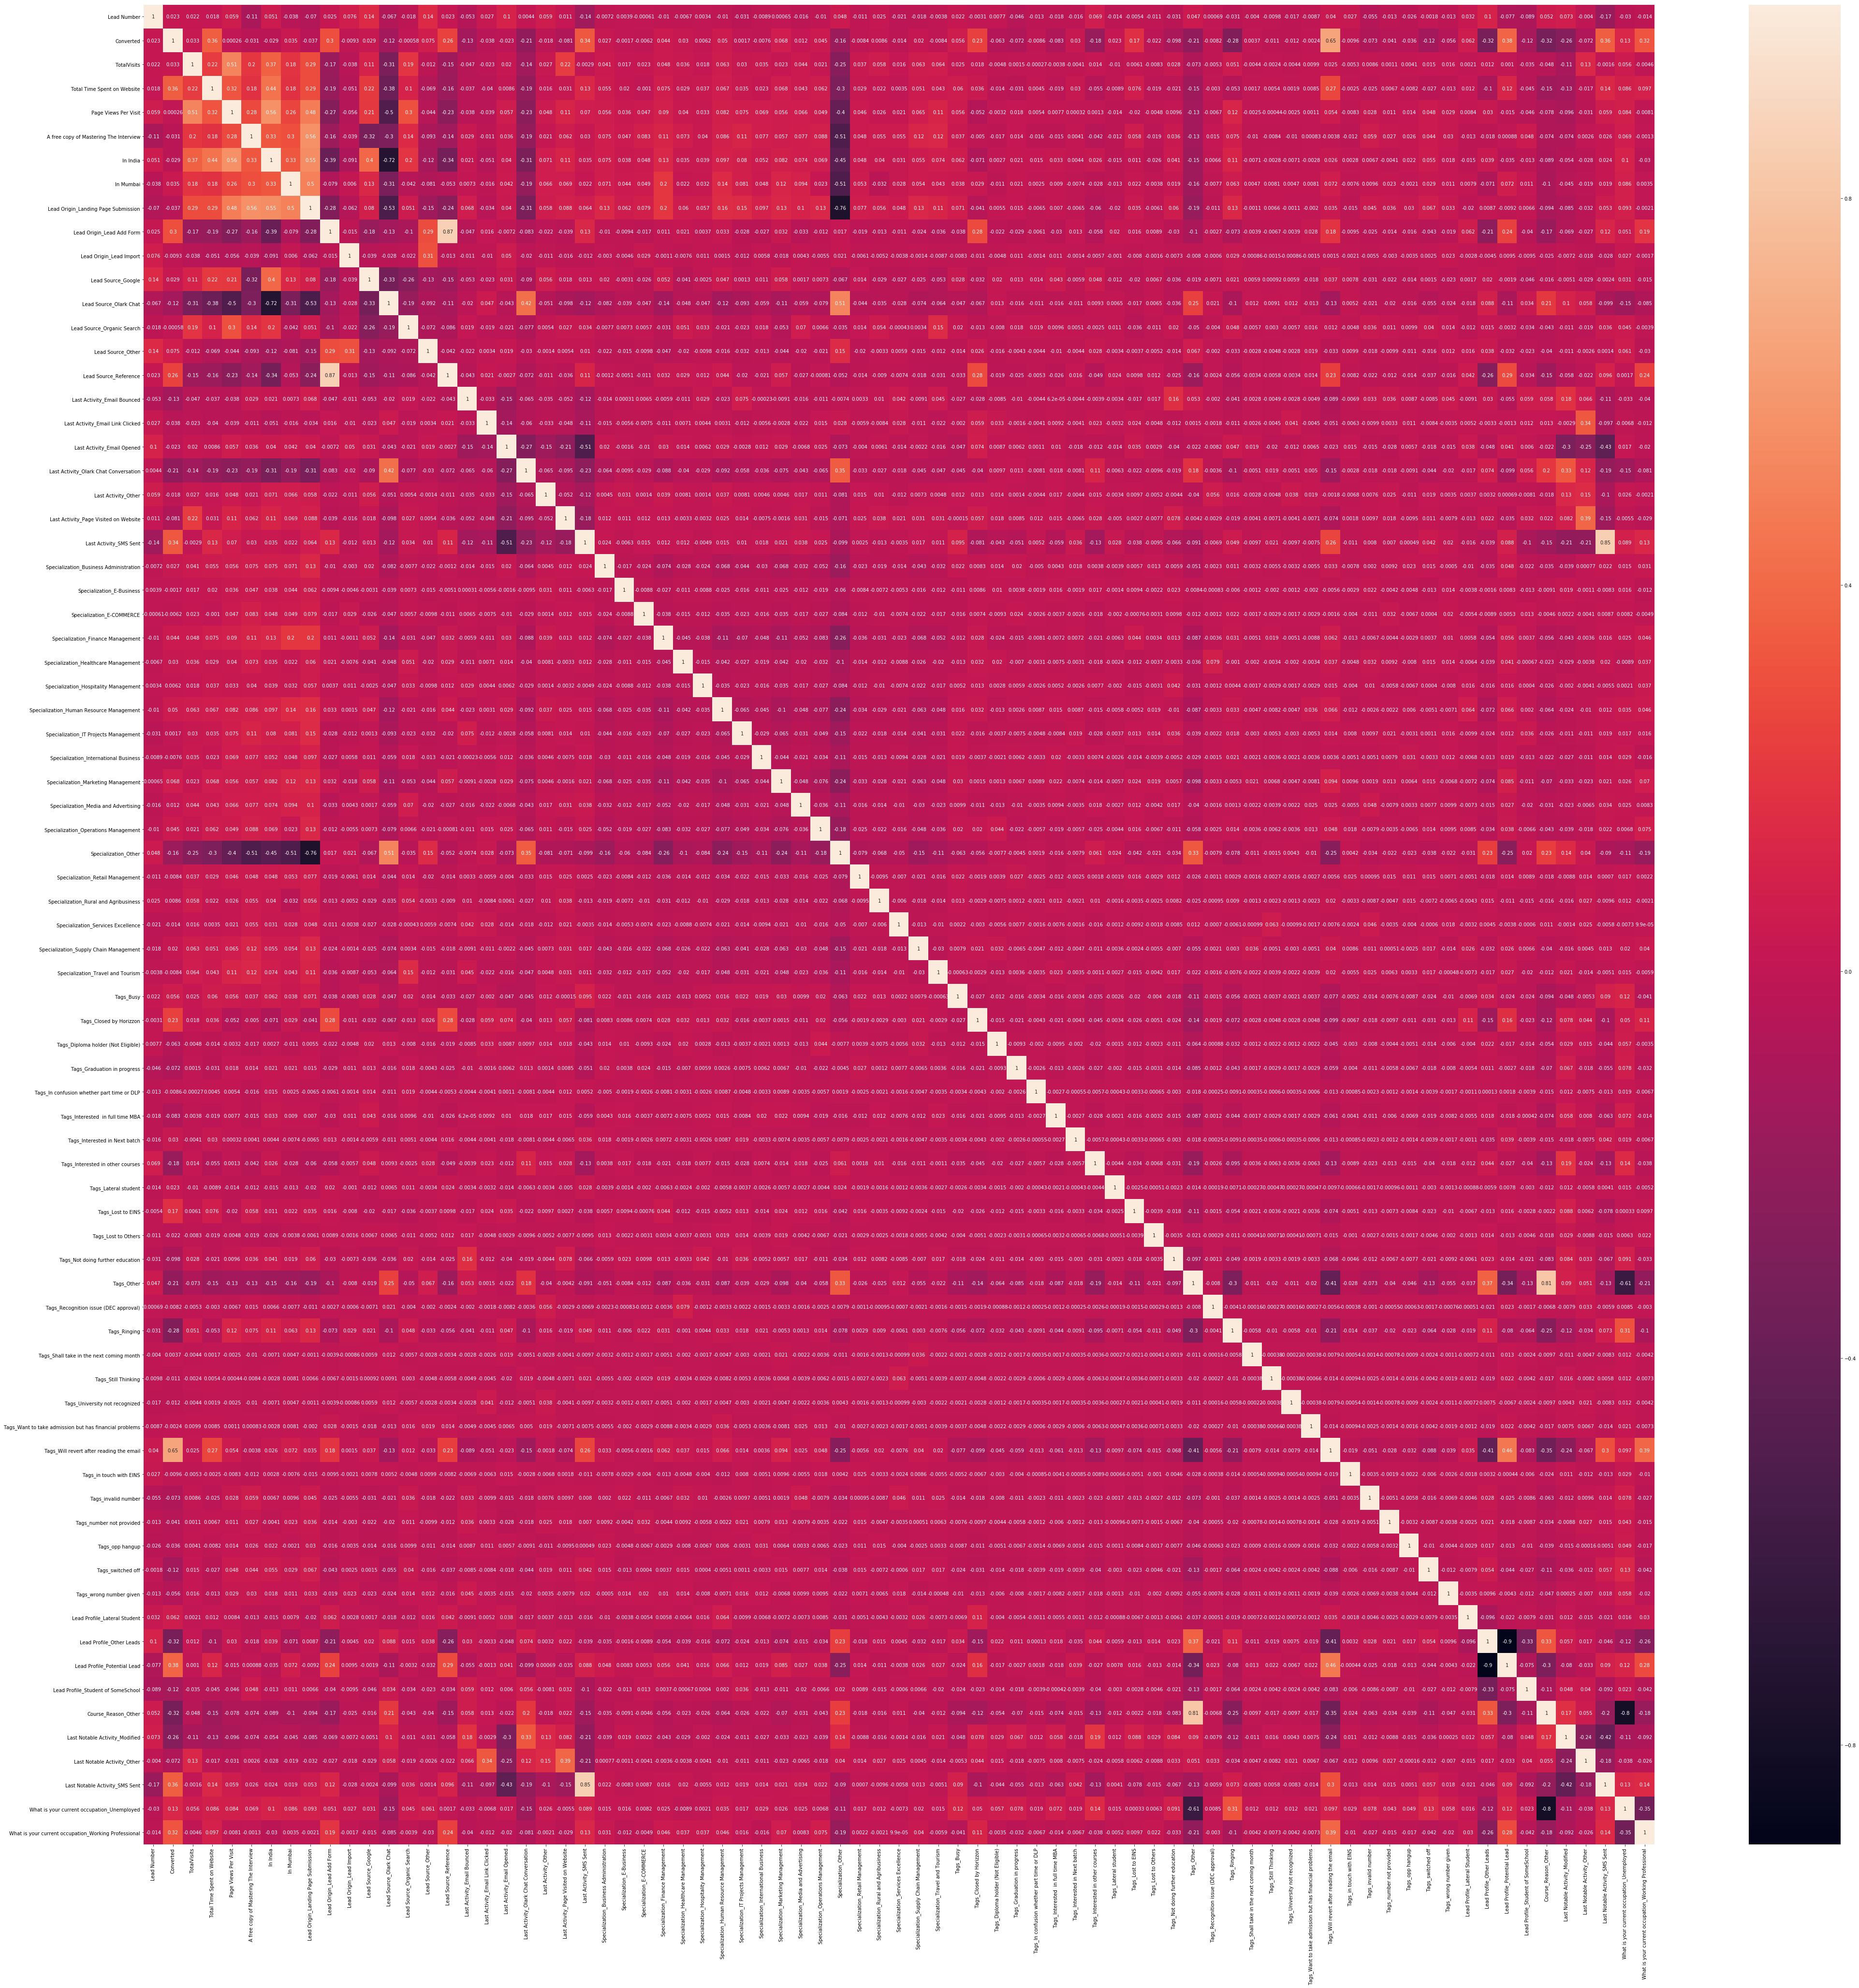

In [556]:
plt.figure(figsize = (70,70))
sns.heatmap(new_df.corr(),annot = True)
plt.show()

In [557]:
#dropping highly correlated variables
X_test = X_test.drop(['In India','Specialization_Other','Lead Origin_Lead Add Form','Tags_Other','Course_Reason_Other',
                      'Lead Profile_Other Leads','Last Notable Activity_SMS Sent'], 1)
X_train = X_train.drop(['In India','Specialization_Other','Lead Origin_Lead Add Form','Tags_Other','Course_Reason_Other',
                      'Lead Profile_Other Leads','Last Notable Activity_SMS Sent'], 1)

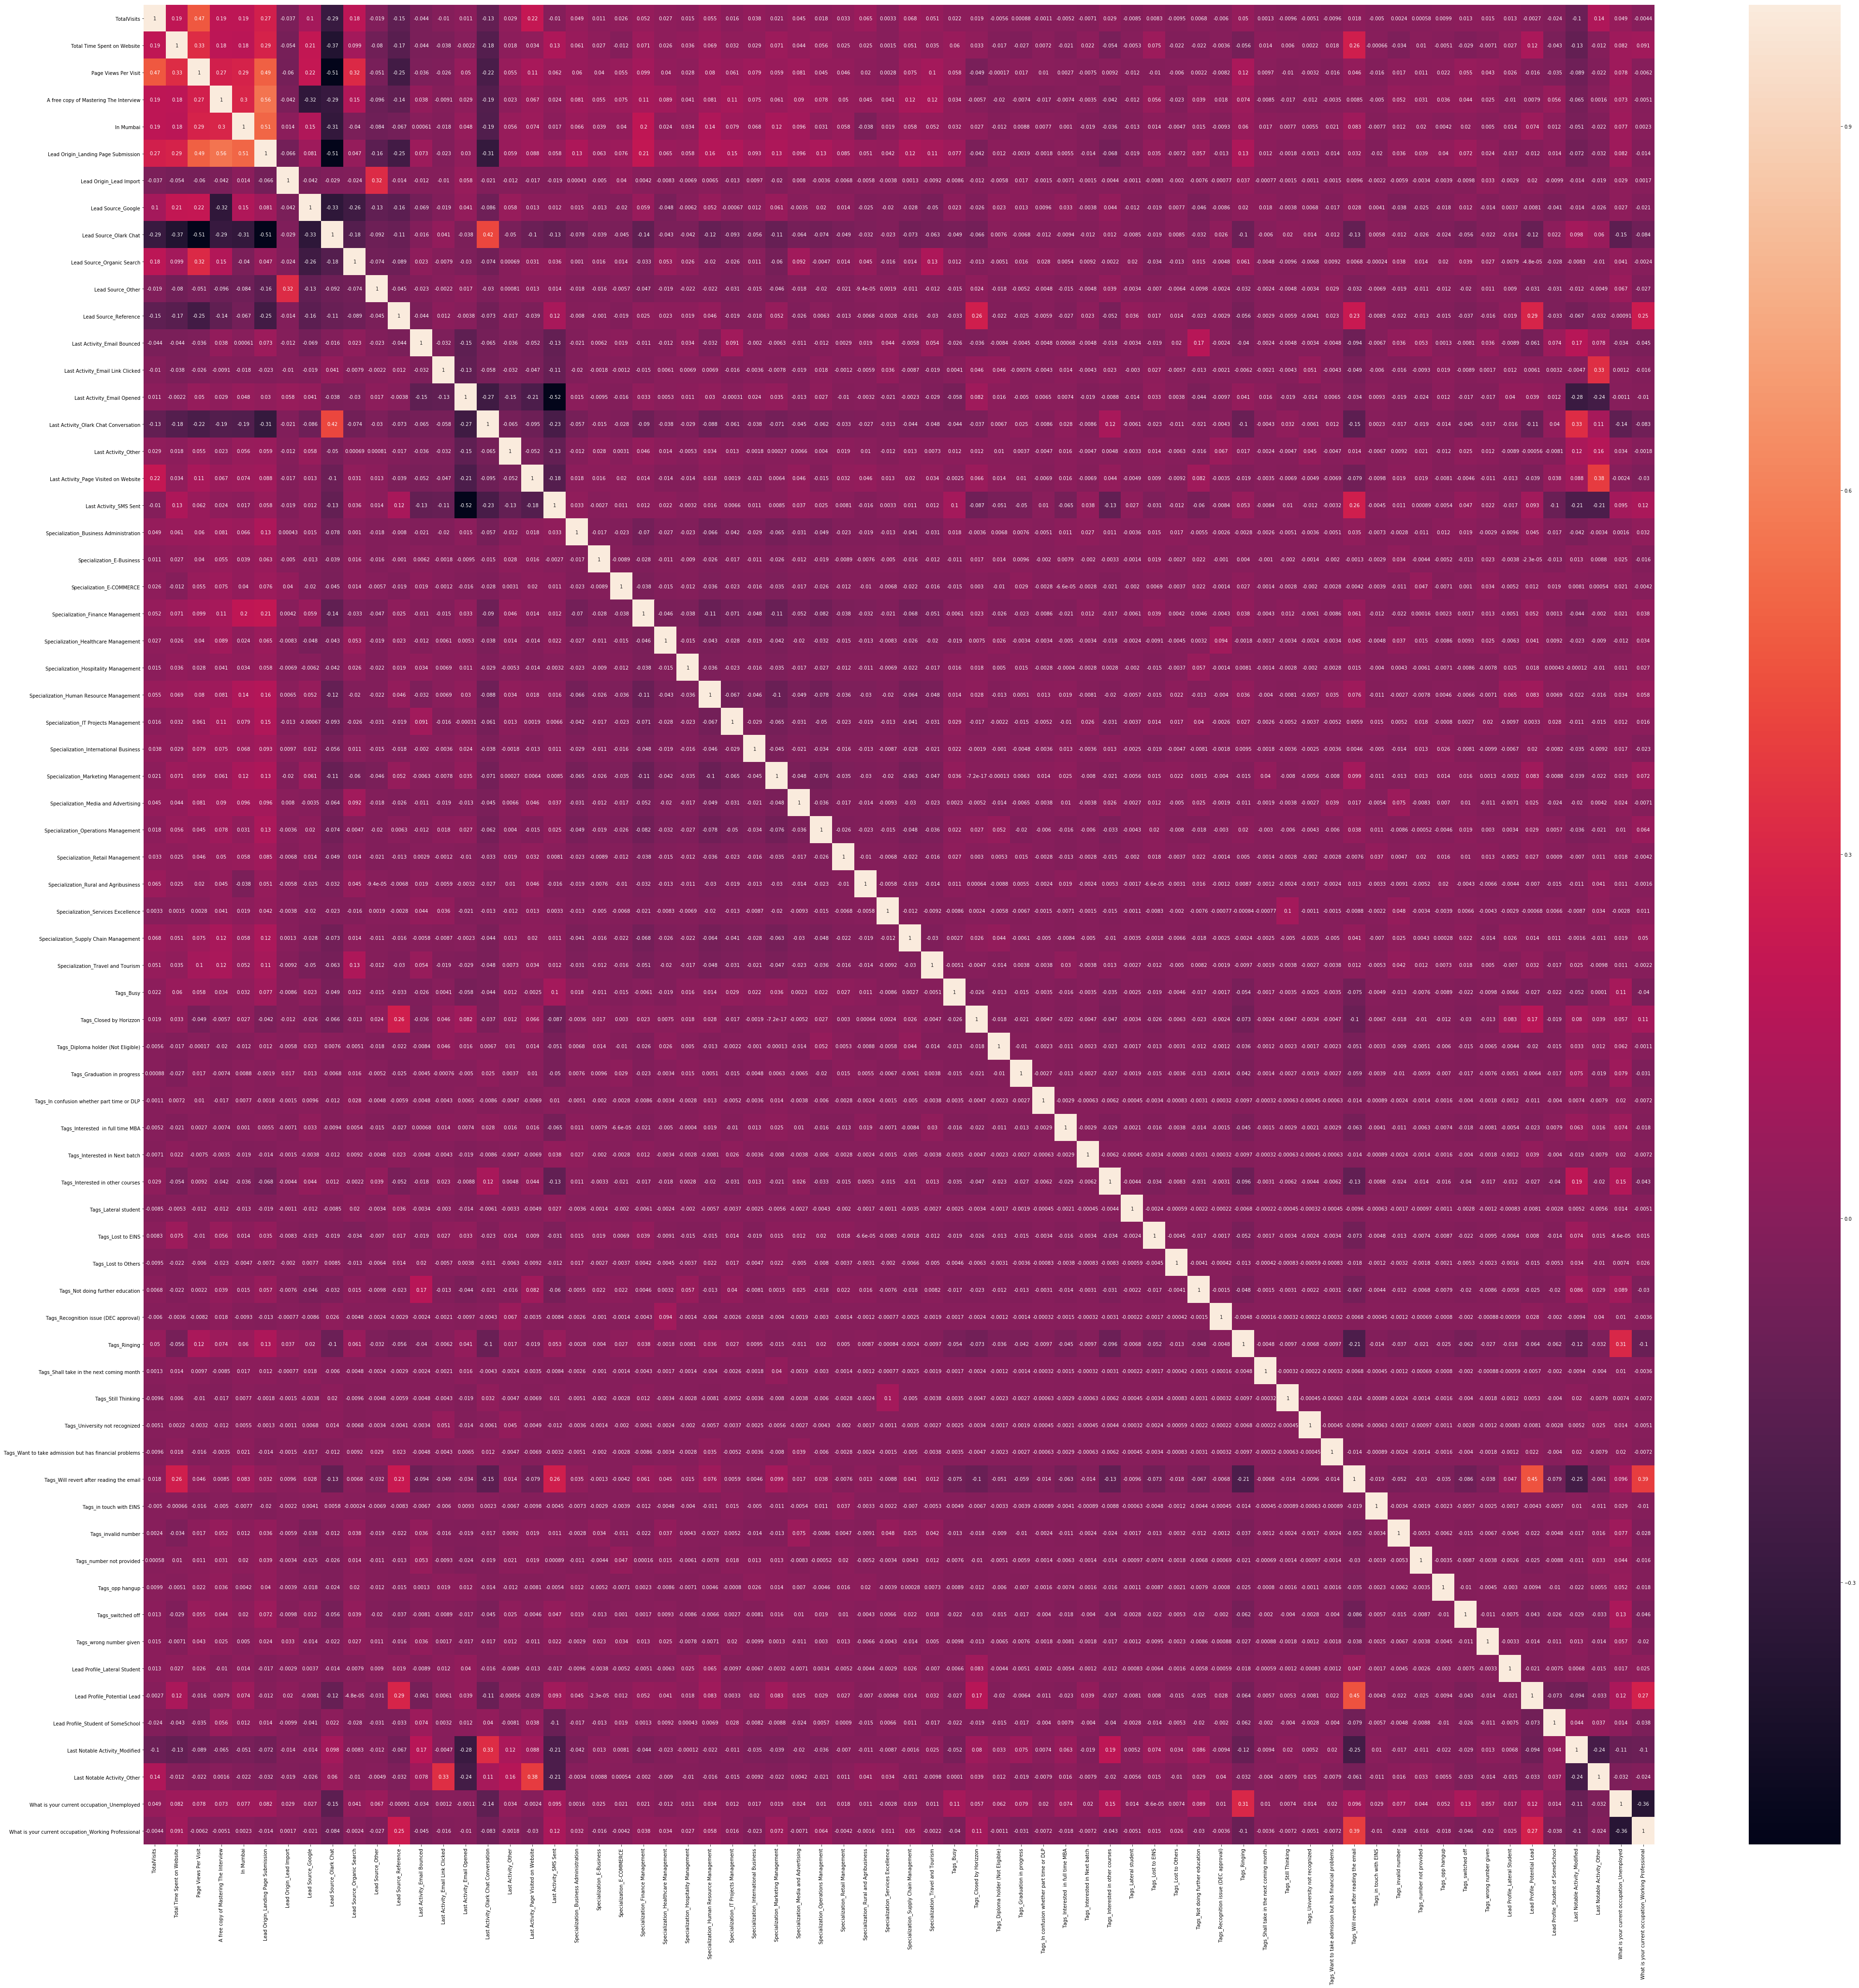

In [559]:
#Checking correlation matrix again
plt.figure(figsize = (70,70))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Modelling of the data

In [570]:
import statsmodels.api as sm

# running first train model for logistic regression
log_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1057.5
Date:                Mon, 09 Mar 2020   Deviance:                       2115.0
Time:                        18:31:09   Pearson chi2:                 1.13e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.9908      0.460     -4.331      0.000      -2.892      -1.090
TotalVisits                                                0.1330      0.036      3.644      0.000       0.061       0.204
Total Time Spent on Website                                1.1326      0.069     16.531      0.000       0.998       1.267
Page Views Per Visit                                      -0.1093      0.078     -1.393      0.163      -0.263       0.044
A free copy of Mastering The Interview                    -0.3583      0.196     -1.833      0.067      -0.742       0.025
In Mumbai                                                  0.0830      0.159      0.522      0.601      -0.228       0.394
Lead Origin_Landing Page Submission                       -0.5983      0.234     -2.559      0.010      -1.056      -0.140
Lead Origin_Lead Import                                   -1.4341      0.939     -1.528      0.127      -3.274       0.405
Lead Source_Google                                         0.2736      0.202      1.352      0.176      -0.123       0.670
Lead Source_Olark Chat                                     1.0937      0.260      4.206      0.000       0.584       1.603
Lead Source_Organic Search                                 0.1741      0.236      0.739      0.460      -0.288       0.636
Lead Source_Other                                          1.8564      0.312      5.946      0.000       1.244       2.468
Lead Source_Reference                                      0.8726      0.557      1.567      0.117      -0.219       1.964
Last Activity_Email Bounced                               -0.1870      0.603     -0.310      0.757      -1.370       0.996
Last Activity_Email Link Clicked                           0.4943      0.545      0.907      0.365      -0.574       1.563
Last Activity_Email Opened                                -0.1237      0.414     -0.299      0.765      -0.935       0.687
Last Activity_Olark Chat Conversation                     -0.4937      0.448     -1.102      0.271      -1.372       0.385
Last Activity_Other                                        0.7980      0.526      1.516      0.129      -0.233       1.830
Last Activity_Page Visited on Website                      0.4348      0.474      0.917      0.359      -0.494       1.364
Last Activity_SMS Sent                                     2.1727      0.405      5.367      0.000       1.379       2.966
Specialization_Business Administration                    -0.0075      0.360     -0.021      0.983      -0.713       0.698
Specialization_E-Business                                 -0.1391      0.705     -0.197      0.844      -1.522       1.244
Specialization_E-COMMERCE                                  0.3837      0.620      0.619

Here, we can see that the model generated has some variables with low p-values. There are several variables also present in the model that have extremely high p-values. However, treating one variable at a time and analysing the model repetitively will take a lot of time. Therefore, we will perform RFE first to select some variables automatically first and then fine-tune the model.

### Feature Selection Using RFE

Since the number of variables is very high, we will use RFE to select some features for further analysis. 

In [571]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

log_reg = LogisticRegression()
rfe = RFE(log_reg, 15)             # running RFE to filter 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [572]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False])

In [573]:
#all columns from train dataset based on their ranking and selection boolean
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 47),
 ('A free copy of Mastering The Interview', False, 28),
 ('In Mumbai', False, 49),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 50),
 ('Lead Source_Other', False, 6),
 ('Lead Source_Reference', False, 11),
 ('Last Activity_Email Bounced', False, 25),
 ('Last Activity_Email Link Clicked', False, 45),
 ('Last Activity_Email Opened', False, 33),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Other', False, 22),
 ('Last Activity_Page Visited on Website', False, 46),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 53),
 ('Specialization_E-Business', False, 54),
 ('Specialization_E-COMMERCE', False, 36),
 ('Specialization_Finance Management', False, 42),
 ('

In [574]:
rfe_col = X_train.columns[rfe.support_] #filtering the columns that are selected

In [575]:
X_train.columns[~rfe.support_] #the columns that are not selected

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'In Mumbai', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Other', 'Lead Source_Reference', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Other', 'Last Activity_Page Visited on Website', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management',
       'Speci

### Modelling based on RFE features

In [579]:
#checking the statistics of the second model created from the features obtained from RFE
X_train_sm = sm.add_constant(X_train[rfe_col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
stats = log_model2.fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1439.1
Date:                Mon, 09 Mar 2020   Deviance:                       2878.1
Time:                        18:56:46   Pearson chi2:                 1.27e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3294      0.069    -19.318      0.000      -1.464      -1.195
Last Activity_SMS Sent                       2.3299      0.106     21.959      0.000       2.122       2.538
Tags_Closed by Horizzon                      7.4164      0.721     10.287      0.000       6.003       8.829
Tags_Diploma holder (Not Eligible)          -2.3323      1.034     -2.256      0.024      -4.359      -0.306
Tags_Interested in other courses            -1.4846      0.326     -4.555      0.000      -2.123      -0.846
Tags_Lost to EINS                            6.8049      0.753      9.040      0.000       5.330       8.280
Tags_Not doing further education            -2.7756      1.029     -2.698      0.007      -4.792      -0.759
Tags_Ringing                                -3.6984      0.243    -15.189      0.000      -4.176      -3.221
Tags_Will revert after reading the email     5.1056      0.196     26.028      0.000       4.721       5.490
Tags_invalid number                        -25.3170   2.49e+04     -0.001      0.999   -4.88e+04    4.87e+04
Tags_number not provided                   -25.2819   4.34e+04     -0.001      1.000   -8.52e+04    8.51e+04
Tags_opp hangup                             -2.1192      0.789     -2.687      0.007      -3.665      -0.573
Tags_switched off                           -3.8132      0.520     -7.329      0.000      -4.833      -2.793
Tags_wrong number given                    -25.2841   3.37e+04     -0.001      0.999   -6.62e+04    6.61e+04
Lead Profile_Student of SomeSchool          -2.9269      0.694     -4.219      0.000      -4.286      -1.567
Last Notable Activity_Modified              -1.9847      0.120    -16.489      0.000      -2.221      -1.749
============================================================================================================
"""

The columns 'Tags_invalid number' and 'Tags_wrong number given' have an extremely high p-value of 0.999. This means that these 2 variables are equally insignificant and, therefore, can be removed. However, we can remove only one variable at a time. This is because removing one variable might turn the other one signifant.

In [580]:
#removing Tags_invalid number column and analysing new model
X_train_sm2 = X_train_sm.drop("Tags_invalid number", 1)
log_model3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
stats2 = log_model3.fit()
stats2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1469.4
Date:                Mon, 09 Mar 2020   Deviance:                       2938.9
Time:                        18:57:15   Pearson chi2:                 1.18e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3639      0.069    -19.847      0.000      -1.499      -1.229
Last Activity_SMS Sent                       2.2494      0.104     21.698      0.000       2.046       2.453
Tags_Closed by Horizzon                      7.4028      0.721     10.272      0.000       5.990       8.815
Tags_Diploma holder (Not Eligible)          -2.2884      1.032     -2.218      0.027      -4.310      -0.266
Tags_Interested in other courses            -1.4483      0.325     -4.461      0.000      -2.085      -0.812
Tags_Lost to EINS                            6.7895      0.752      9.031      0.000       5.316       8.263
Tags_Not doing further education            -2.7260      1.026     -2.656      0.008      -4.738      -0.714
Tags_Ringing                                -3.5962      0.242    -14.847      0.000      -4.071      -3.121
Tags_Will revert after reading the email     5.1150      0.195     26.226      0.000       4.733       5.497
Tags_number not provided                   -24.1866   2.65e+04     -0.001      0.999   -5.19e+04    5.18e+04
Tags_opp hangup                             -2.0300      0.786     -2.584      0.010      -3.570      -0.490
Tags_switched off                           -3.7066      0.520     -7.135      0.000      -4.725      -2.688
Tags_wrong number given                    -24.1871   2.06e+04     -0.001      0.999   -4.03e+04    4.03e+04
Lead Profile_Student of SomeSchool          -2.9192      0.694     -4.208      0.000      -4.279      -1.560
Last Notable Activity_Modified              -1.9269      0.119    -16.180      0.000      -2.160      -1.693
============================================================================================================
"""

Now, the columns 'Tags_number not provided' and 'Tags_wrong number given' have an extremely high p-value of 0.999. We will remove either of the two variables and check the model again.

In [581]:
#removing Tags_wrong number given column and analysing new model
X_train_sm3 = X_train_sm2.drop("Tags_wrong number given", 1)
log_model4 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
stats3 = log_model4.fit()
stats3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1484.7
Date:                Mon, 09 Mar 2020   Deviance:                       2969.3
Time:                        19:00:43   Pearson chi2:                 1.15e+04
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3762      0.069    -20.032      0.000      -1.511      -1.242
Last Activity_SMS Sent                       2.2041      0.103     21.501      0.000       2.003       2.405
Tags_Closed by Horizzon                      7.4014      0.721     10.272      0.000       5.989       8.814
Tags_Diploma holder (Not Eligible)          -2.2684      1.030     -2.201      0.028      -4.288      -0.249
Tags_Interested in other courses            -1.4300      0.324     -4.413      0.000      -2.065      -0.795
Tags_Lost to EINS                            6.7879      0.751      9.034      0.000       5.315       8.261
Tags_Not doing further education            -2.7013      1.025     -2.634      0.008      -4.711      -0.692
Tags_Ringing                                -3.5457      0.242    -14.676      0.000      -4.019      -3.072
Tags_Will revert after reading the email     5.1223      0.195     26.320      0.000       4.741       5.504
Tags_number not provided                   -23.1399   1.61e+04     -0.001      0.999   -3.15e+04    3.15e+04
Tags_opp hangup                             -1.9869      0.784     -2.535      0.011      -3.523      -0.451
Tags_switched off                           -3.6537      0.519     -7.038      0.000      -4.671      -2.636
Lead Profile_Student of SomeSchool          -2.9142      0.694     -4.197      0.000      -4.275      -1.553
Last Notable Activity_Modified              -1.9101      0.118    -16.122      0.000      -2.142      -1.678
============================================================================================================
"""

Since the p-value of the column 'Tags_number not provided' has remained unchanged at 0.999, we will remove this column and analyse the model once again.

In [582]:
#removing Tags_wrong number given column and analysing new model
X_train_sm4 = X_train_sm3.drop("Tags_number not provided", 1)
log_model5 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
stats4 = log_model5.fit()
stats4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1493.7
Date:                Mon, 09 Mar 2020   Deviance:                       2987.5
Time:                        19:05:07   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3877      0.069    -20.211      0.000      -1.522      -1.253
Last Activity_SMS Sent                       2.1840      0.102     21.433      0.000       1.984       2.384
Tags_Closed by Horizzon                      7.3983      0.720     10.269      0.000       5.986       8.810
Tags_Diploma holder (Not Eligible)          -2.2553      1.030     -2.190      0.029      -4.274      -0.237
Tags_Interested in other courses            -1.4193      0.324     -4.385      0.000      -2.054      -0.785
Tags_Lost to EINS                            6.7839      0.751      9.033      0.000       5.312       8.256
Tags_Not doing further education            -2.6873      1.025     -2.622      0.009      -4.696      -0.679
Tags_Ringing                                -3.5175      0.241    -14.578      0.000      -3.990      -3.045
Tags_Will revert after reading the email     5.1262      0.194     26.382      0.000       4.745       5.507
Tags_opp hangup                             -1.9621      0.783     -2.506      0.012      -3.497      -0.427
Tags_switched off                           -3.6243      0.519     -6.984      0.000      -4.642      -2.607
Lead Profile_Student of SomeSchool          -2.9094      0.695     -4.188      0.000      -4.271      -1.548
Last Notable Activity_Modified              -1.8924      0.118    -16.014      0.000      -2.124      -1.661
============================================================================================================
"""

In this model, we can see that the p-values of all the variables are almost reaching 0. This shows that all the variables in the model are significant. The Pearson co-eff of the model is also very low which indicates that this is a good model.

In [583]:
#predicting probability on the basis of the train dataset
y_train_pred = stats4.predict(X_train_sm4)
y_train_pred[:10]

3009    0.199768
1012    0.199768
9226    0.009818
4750    0.689165
7987    0.996624
1281    0.997328
2880    0.199768
4971    0.689165
7536    0.976761
1248    0.009818
dtype: float64

In [584]:
y_train_pred = y_train_pred.values.reshape(-1) #reshaping the predicted values as an array
y_train_pred[:10]

array([0.19976832, 0.19976832, 0.00981784, 0.68916461, 0.99662417,
       0.99732834, 0.19976832, 0.68916461, 0.97676126, 0.00981784])

In [656]:
#creating a dataframe with the conversion probability and the 'Converted' column of the original dataset
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final['Score'] = y_train_pred_final['Conversion_Prob']*100
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number      Score
0          0         0.199768         3009  19.976832
1          0         0.199768         1012  19.976832
2          0         0.009818         9226   0.981784
3          1         0.689165         4750  68.916461
4          1         0.996624         7987  99.662417

In [666]:
y_train_pred_final['Conversion_Pred'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead Number  Converted  Conversion_Prob      Score  Conversion_Pred
0         3009          0         0.199768  19.976832                0
1         1012          0         0.199768  19.976832                0
2         9226          0         0.009818   0.981784                0
3         4750          1         0.689165  68.916461                1
4         7987          1         0.996624  99.662417                1

In [668]:
#rearranging final train dataset
y_train_pred_final = y_train_pred_final.reindex_axis(['Lead Number','Converted','Conversion_Prob','Score',
                                                      'Conversion_Pred'], axis=1)
y_train_pred_final.head()

Lead Number  Converted  Conversion_Prob      Score  Conversion_Pred
0         3009          0         0.199768  19.976832                0
1         1012          0         0.199768  19.976832                0
2         9226          0         0.009818   0.981784                0
3         4750          1         0.689165  68.916461                1
4         7987          1         0.996624  99.662417                1

### Checking VIFs of variables in model

In [623]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ["Last Activity_SMS Sent","Tags_Closed by Horizzon","Tags_Diploma holder (Not Eligible)","Tags_Interested in other courses",
       "Tags_Lost to EINS","Tags_Not doing further education","Tags_Ringing","Tags_Will revert after reading the email","Tags_opp hangup",
       "Tags_switched off","Lead Profile_Student of SomeSchool","Last Notable Activity_Modified"]
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                    Tags_Closed by Horizzon  1.04
4                          Tags_Lost to EINS  1.03
5           Tags_Not doing further education  1.03
9                          Tags_switched off  1.03
10        Lead Profile_Student of SomeSchool  1.02
2         Tags_Diploma holder (Not Eligible)  1.01
8                            Tags_opp hangup  1.00
3           Tags_Interested in other courses  0.34
7   Tags_Will revert after reading the email  0.14
11            Last Notable Activity_Modified  0.13
0                     Last Activity_SMS Sent  0.12
6                               Tags_Ringing  0.07

As seen above, all the features selected in RFE have very low VIFs. Hence, we will not have to delete any variable based on the VIF values.

In [667]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred )
print(confusion)

[[3729  176]
 [ 349 2097]]


Based on the confusion matrix, we can see that while there are 3729 true negatives, there are 349 false negatives. Additionally, this model has generated 2097 true positives and 176 false negatives.

In [619]:
#checking accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Pred))

0.9173358526216344


The accuracy of the model is 91.7% approximately. Hence, we will be using this model.

## Determining optimum cut-off probability for conversion

### Plotting ROC curve

In [677]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [678]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

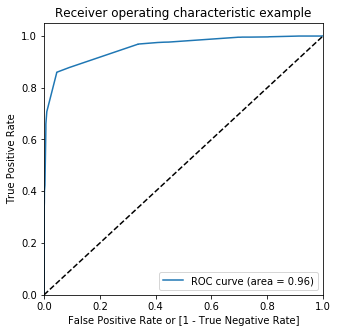

In [679]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Based on the ROC curve above, the area under the curve = 0.96. This implies that the model is a good one.

In [680]:
#dataframe using different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Lead Number  Converted  Conversion_Prob      Score  Conversion_Pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0         3009          0         0.199768  19.976832                0    1    1    0    0    0    0    0    0    0    0
1         1012          0         0.199768  19.976832                0    1    1    0    0    0    0    0    0    0    0
2         9226          0         0.009818   0.981784                0    1    0    0    0    0    0    0    0    0    0
3         4750          1         0.689165  68.916461                1    1    1    1    1    1    1    1    0    0    0
4         7987          1         0.996624  99.662417                1    1    1    1    1    1    1    1    1    1    1

In [681]:
#dataframe with accuracy, sensitivity, and specificity across various probability cut-offs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.780664  0.968520  0.662996
0.2   0.2  0.896237  0.878986  0.907042
0.3   0.3  0.917966  0.859362  0.954673
0.4   0.4  0.917336  0.857318  0.954930
0.5   0.5  0.917336  0.857318  0.954930
0.6   0.6  0.917336  0.857318  0.954930
0.7   0.7  0.881121  0.706868  0.990269
0.8   0.8  0.881121  0.706868  0.990269
0.9   0.9  0.864903  0.659444  0.993598


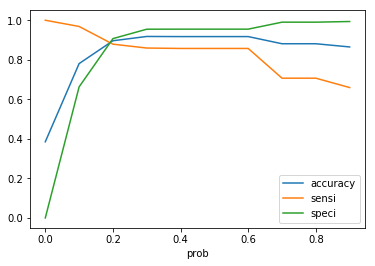

In [682]:
# plotting the accuracy, sensitivity and specificity dataframe
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The accuracy, sensitivity and specificity curves seem to intersect at the probability cut-off of 0.2. Hence, this probability cut-off seems to be optimum.

In [684]:
y_train_pred_final['Final_Conversion_Pred'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Lead Number  Converted  Conversion_Prob      Score  Conversion_Pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  Final_Conversion_Pred
0         3009          0         0.199768  19.976832                0    1    1    0    0    0    0    0    0    0    0                      0
1         1012          0         0.199768  19.976832                0    1    1    0    0    0    0    0    0    0    0                      0
2         9226          0         0.009818   0.981784                0    1    0    0    0    0    0    0    0    0    0                      0
3         4750          1         0.689165  68.916461                1    1    1    1    1    1    1    1    0    0    0                      1
4         7987          1         0.996624  99.662417                1    1    1    1    1    1    1    1    1    1    1                      1

In [685]:
#checking accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Conversion_Pred)

0.8962368131002991

In [686]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Conversion_Pred)
confusion2

array([[3542,  363],
       [ 296, 2150]], dtype=int64)

In [687]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print(TP / float(TP+FN)) #sensitivity
print(TN / float(TN+FP)) #specificity

0.8789860997547015
0.9070422535211268


When the probability cut-off is 0.2, the accuracy is approximately 90% while sensitivity is around 88% and specificity is 90%.

### Probability based on precision and recall

In [692]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred) #precision based on the final model

0.9225692916849978

In [693]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Conversion_Pred) #recall based on the final model

0.857318070318888

In [694]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

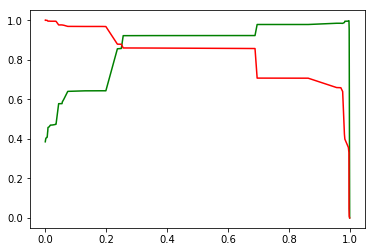

In [696]:
# plotting precision and recall of final model
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The cut-off probability for optimum precision and recall is at 0.22 approximately. Therefore, we will finally be selecting this cut-off in the model for predictions.

## Making predictions based on test dataset

In [622]:
#scaling the continous variables in test dataset
X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']])

In [624]:
X_test = X_test[model_col] #filtering dataset using required variables
X_test.head()

Last Activity_SMS Sent  Tags_Closed by Horizzon  Tags_Diploma holder (Not Eligible)  Tags_Interested in other courses  Tags_Lost to EINS  Tags_Not doing further education  Tags_Ringing  Tags_Will revert after reading the email  Tags_opp hangup  Tags_switched off  Lead Profile_Student of SomeSchool  Last Notable Activity_Modified
3271                       0                        0                                   0                                 0                  0                                 0             0                                         0                0                  0                                   0                               0
1490                       0                        0                                   0                                 0                  0                                 0             0                                         1                0                  0                                   0                               0
7936                       0                        0                                   0                                 0                  0                                 0             0                                         0                0                  0                                   0                               0
4216                       0                        1                                   0                                 0                  0                                 0             0                                         0                0                  0                                   0                               1
3830                       0                        0                                   0                                 0                  0                                 0             0                                         0                0                  0                                   0                               0

In [625]:
X_test_sm = sm.add_constant(X_test) 

In [658]:
y_test_pred = stats4.predict(X_test_sm) #making predictions on test dataset using the final model
y_test_pred[:10]

3271    0.199768
1490    0.976761
7936    0.199768
4216    0.983986
3830    0.199768
1800    0.976761
6507    0.061728
4821    0.006613
4223    0.997328
4714    0.250460
dtype: float64

In [659]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
#y_pred_df.head()

In [660]:
#prediction final dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

Converted  Lead Number         0
0          0         3271  0.199768
1          1         1490  0.976761
2          0         7936  0.199768
3          1         4216  0.983986
4          0         3830  0.199768

In [697]:
#renaming the probability column and rearranging similar to train dataset
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final["Score"] = y_pred_final["Conversion_Prob"]*100
y_pred_final['Final_Conversion_Pred'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.22 else 0)
y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Conversion_Prob','Score','Final_Conversion_Pred'], axis=1)
y_pred_final.head()

Lead Number  Converted  Conversion_Prob      Score  Final_Conversion_Pred
0         3271          0         0.199768  19.976832                      0
1         1490          1         0.976761  97.676126                      1
2         7936          0         0.199768  19.976832                      0
3         4216          1         0.983986  98.398580                      1
4         3830          0         0.199768  19.976832                      0

In [698]:
#checking accuracy of test dataset
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Conversion_Pred)

0.8905618802791039

In [699]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Conversion_Pred)
confusion2

array([[1568,  166],
       [ 132,  857]], dtype=int64)

In [700]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

TP / float(TP+FN) #sensitivity of model

0.8665318503538928

In [701]:
TN / float(TN+FP) #specificity of model

0.9042675893886967

While the accuracy of the test dataset is 89% percent, it has a sensitivity of 87% and specificity of 90% approximately.

## Recommendations

The company can employ different strategies based on the column named 'Score' in the dataset. Higher the score of a lead, greater the chances for conversion of that person.
The cut-off score is 22. If the score of a lead is higher than the cut-off score then he/she might enroll for a course from the organisation.